In [1]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygad
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sys import stdout
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


df = pd.read_excel("datasets/Dataset_2.xlsx",sheet_name="preproc")

alpha = 0.00122457013067159
trials = 1
seeds = np.random.choice(trials + 1, size=trials, replace= False)

INPUT DATA

In [2]:
X = (df.iloc[:,14:]).values
print(X.shape)


(2905, 530)


OUTPUT DATA

In [3]:
y = (df.iloc[:,7]).values
print(y.shape)

(2905,)


**NEGNRMSEPiqr**

In [4]:


def NEGNRMSEPiqr(observed_values, predicted_values):
    # Calculate RMSEP
    rmsep = np.sqrt(np.mean((observed_values - predicted_values) ** 2))
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(observed_values, 25)
    Q3 = np.percentile(observed_values, 75)

    # Calculate IQR
    IQR = Q3 - Q1

    return -rmsep/IQR


NEGNRMSEPiqrscorer = make_scorer(NEGNRMSEPiqr)

**NRMSEPiqr**

In [5]:

def NRMSEPiqr(observed_values, predicted_values):
    # Calculate RMSEP
    rmsep = np.sqrt(np.mean((observed_values - predicted_values) ** 2))
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(observed_values, 25)
    Q3 = np.percentile(observed_values, 75)

    # Calculate IQR
    IQR = Q3 - Q1

    return rmsep/IQR


NRMSEPiqrscorer = make_scorer(NRMSEPiqr)

Fitness Function

In [6]:
def fitness_function(ga_instance, solution, solution_idx):
    # Select wavelengths based on the solution
    selected_wavelengths = np.where(solution == 1)[0]
    if len(selected_wavelengths) == 0:
        return -1e6  # Penalize solutions with no selected wavelengths
    
    X_selected = X[:, selected_wavelengths]
    
    # Model
    ridge = make_pipeline(StandardScaler(),Ridge(alpha=alpha))
    scores = cross_val_score(ridge, X_selected, y, cv=5, scoring=NEGNRMSEPiqrscorer)
    
    # Use the mean score as the fitness value (higher is better)
    return np.mean(scores)


Main

/home/demetra/Desktop/Demetra/.venv/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation: 1, Fitness: -0.43012070479005526
Generation: 2, Fitness: -0.4107626652377571
Generation: 3, Fitness: -0.40234220197024745
Generation: 4, Fitness: -0.39009493902020825
Generation: 5, Fitness: -0.38589598524926094
Generation: 6, Fitness: -0.38105092152583603
Generation: 7, Fitness: -0.37836382194211515
Generation: 8, Fitness: -0.37501041445149086
Generation: 9, Fitness: -0.37191492210183064
Generation: 10, Fitness: -0.36860470118503336
Generation: 11, Fitness: -0.36637018723216014
Generation: 12, Fitness: -0.36511853874332967
Generation: 13, Fitness: -0.36316572030258015
Generation: 14, Fitness: -0.3628463047296334
Generation: 15, Fitness: -0.3628463047296334
Generation: 16, Fitness: -0.36259114040427515
Generation: 17, Fitness: -0.36259114040427515
Generation: 18, Fitness: -0.3616672492463994
Generation: 19, Fitness: -0.36100086595658165
Generation: 20, Fitness: -0.36100086595658165
Generation: 21, Fitness: -0.35996733853163637
Generation: 22, Fitness: -0.35996733853163637
G

/home/demetra/Desktop/Demetra/.venv/lib/python3.12/site-packages/pygad/visualize/plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


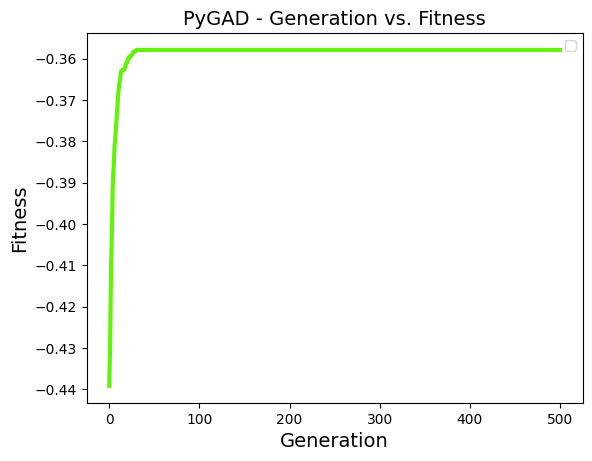

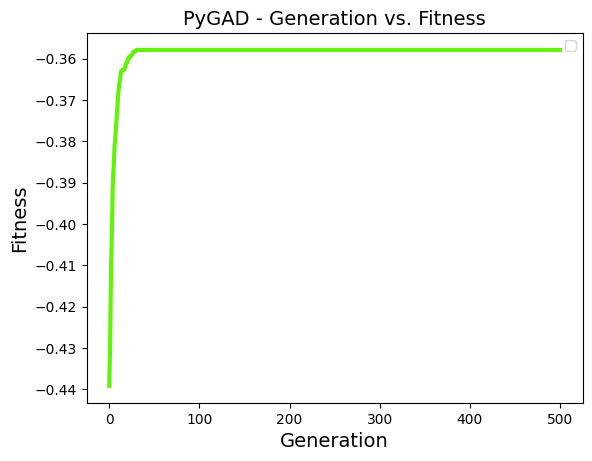

In [7]:
# Number of wavelengths (genes)
num_wavelengths = X.shape[1]

# Create the GA instance
ga_instance = pygad.GA(
    num_generations=500,             # Number of generations
    num_parents_mating=50,          # Number of parents for crossover
    fitness_func=fitness_function,  # Fitness function
    sol_per_pop=5000,                 # Population size
    num_genes=num_wavelengths,      # Number of wavelengths
    gene_type=int,                  # Binary genes (0 or 1)
    init_range_low=0,               # Genes initialized to 0
    init_range_high=2,              # Genes initialized to 1 (binary)
    parent_selection_type="sss",    # Stochastic sampling selection
    crossover_type="single_point",  # Single-point crossover
    mutation_type="random",         # Random mutation
    mutation_percent_genes=20,      # Mutate 20% of the genes
    on_generation=lambda ga: print(f"Generation: {ga.generations_completed}, Fitness: {ga.best_solution()[1]}")
)

# Run the genetic algorithm
ga_instance.run()

# Best solution
solution, solution_fitness, _ = ga_instance.best_solution()
print(f"Selected wavelengths: {np.where(solution == 1)[0]}")
print(f"Best fitness value: {solution_fitness}")

# Plot the fitness values over generations
ga_instance.plot_fitness()

In [8]:
X[:, np.where(solution == 1)[0]]

array([[0.03750743, 0.03787552, 0.04200437, ..., 0.10684173, 0.0990498 ,
        0.0321091 ],
       [0.06213926, 0.06764635, 0.06962156, ..., 0.12813679, 0.12073678,
        0.05250861],
       [0.05321459, 0.05523473, 0.05861811, ..., 0.12392044, 0.11623079,
        0.04788024],
       ...,
       [0.03977072, 0.0404536 , 0.04878837, ..., 0.1276644 , 0.12032404,
        0.04334567],
       [0.04466646, 0.0465711 , 0.05368769, ..., 0.13120949, 0.12355165,
        0.04585792],
       [0.03489081, 0.03681923, 0.043922  , ..., 0.11715194, 0.10979925,
        0.03757665]], shape=(2905, 42))

In [9]:
import time

trials = 100
random_cv = np.random.seed(777)
seeds = np.random.choice(trials + 1, size=trials, replace= False)
ripartition = 0.25
final_results_ridge = []
alpha = 0.00122457013067159

predictions_ridge = []
result_NRMSEP_ridge = []
NRMSE = []
total_time = 0
for i in range(trials):
    X_train, X_test, Y_train, Y_test = train_test_split(X[:, np.where(solution == 1)[0]], y, test_size=ripartition, random_state=seeds[i])
    ridge = make_pipeline(StandardScaler(),Ridge(alpha=alpha))
            
    start_time = time.time()
    ridge.fit(X_train, Y_train)
    elapsed_time = (time.time() -start_time) #elapsed time in seconds
        
    # Make predictions using the testing set
    Y_pred_ridge = ridge.predict(X_test)

        
    NRMSE.append(NRMSEPiqr(Y_test, Y_pred_ridge))
    total_time+=elapsed_time
        
    for k in range(len(Y_pred_ridge)):

      predictions_ridge.append({"Ripartition":str(ripartition *100 ),
                        "NRMSEPiqr": NRMSEPiqr(Y_test, Y_pred_ridge),
                        "Training time": elapsed_time, 
                        "alpha": alpha, 
                        "Seed": seeds[i],
                          "Prediction": Y_pred_ridge[k], 
                          "Actual": Y_test[k] })
        
    result_NRMSEP_ridge.append({"Ripartition":str(ripartition *100 ),
                        "NRMSEPiqr": NRMSEPiqr(Y_test, Y_pred_ridge),
                        "Training time": elapsed_time, 
                        "alpha": alpha, 
                        "Seed": seeds[i],
        })
final_results_ridge.append({"Test size(%)": str(ripartition *100 ),
                          "Mean NRMSEPiqr":np.mean(NRMSE), 
                          "Var NRMSEPiqr": np.var(NRMSE),
                          "Mean Training Time (sec)":total_time/trials, 
                          "alpha": alpha })
       


In [10]:
print(final_results_ridge)

[{'Test size(%)': '25.0', 'Mean NRMSEPiqr': np.float64(0.3038922408555362), 'Var NRMSEPiqr': np.float64(0.0002606822042824199), 'Mean Training Time (sec)': 0.0015593481063842774, 'alpha': 0.00122457013067159}]
